In [1]:
!pip install prophet

In [2]:
# Run 1st

import pandas as pd
import requests
import json
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Run 2nd

pandora_necklace_df = pd.read_csv('resources/pandora_necklace_search.csv', skiprows=1, header=None, names=['Month', 'Pandora Necklace'])
pandora_rings_df = pd.read_csv('resources/pandora_rings_search.csv', skiprows=1, header=None, names=['Month', 'Pandora Ring'])
pandora_bracelet_df = pd.read_csv('resources/pandora_bracelet_search.csv', skiprows=1, header= None, names=['Month', 'Pandora Bracelet'])

In [6]:
# Run 3rd 

list_of_dfs = [pandora_necklace_df]

def clean_dataframes(dfs_list):
    for df in dfs_list:
        df.drop(0, inplace=True)

clean_dataframes(list_of_dfs)
pandora_necklace_df

#running_shorts_df['Month'].dtype, tennis_skirt_df['Month'].dtype, lulu_lemon_df['Month'].dtype 

,Month,Pandora Necklace
1,2014-01,0
2,2014-02,0
3,2014-03,0
4,2014-04,0
5,2014-05,0
...,...,...
116,2023-08,6
117,2023-09,8
118,2023-10,30
119,2023-11,56


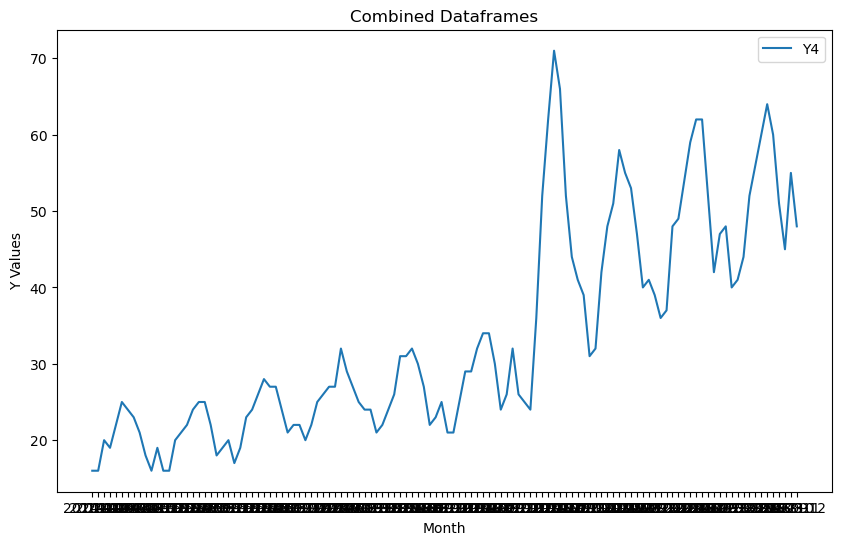

In [30]:
# RUN 4th

df1 = running_shorts_df 
df2 = tennis_skirt_df
df3 = lulu_lemon_df  

# Merge or concatenate dataframes based on the date
merged_df = pd.merge(df1, df2, on='Month').merge(df3, on='Month')

merged_df['Running Shorts'] = pd.to_numeric(merged_df['Running Shorts'], errors='coerce')
merged_df['Tennis Skirts'] = pd.to_numeric(merged_df['Tennis Skirts'], errors='coerce')
merged_df['lululemon Sales'] = pd.to_numeric(merged_df['lululemon Sales'], errors='coerce')

# Convert 'Date' column to datetime
#merged_df['Month'] = pd.to_datetime(merged_df['Month']).dt.date
merged_df['Y4'] = ((merged_df['Running Shorts'] + merged_df['Tennis Skirts'] + merged_df['lululemon Sales']) / 3).astype(int)

# Plot the data
plt.figure(figsize=(10, 6))

# plt.plot(merged_df['Month'], merged_df['Running Shorts'], label='Y1')
# plt.plot(merged_df['Month'], merged_df['Tennis Skirts'], label='Y2')
# plt.plot(merged_df['Month'], merged_df['lululemon Sales'], label='Y3')
# df_home_sales[["inventory", "homes_sold"]].corr()

# Plot the average
plt.plot(merged_df['Month'], merged_df['Y4'], label='Y4')

plt.xlabel('Month')
plt.ylabel('Y Values')
plt.title('Combined Dataframes')
merged_df.head()
plt.legend()
plt.show()

In [34]:
# Run 5th

stock_and_google_trends_df = merged_df
merged_df

,Month,Running Shorts,Tennis Skirts,lululemon Sales,Y4
0,2014-01,19,8,23,16
1,2014-02,22,8,20,16
2,2014-03,29,10,22,20
3,2014-04,31,8,20,19
4,2014-05,38,10,18,22
...,...,...,...,...,...
115,2023-08,56,63,63,60
116,2023-09,42,55,57,51
117,2023-10,33,42,61,45
118,2023-11,34,32,100,55


In [53]:
# Run 6th

import yfinance as yf
import pandas as pd

# Your existing code to get the stock data
ticker_symbol = 'NKE'
start_date = '2014-01-01'
end_date = '2023-01-01'
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(start=start_date, end=end_date, interval="1mo")
df = pd.DataFrame(hist).reset_index().rename(columns={'Date': 'Month'})

# Convert 'Month' to datetime format (if not already)
df['Month'] = pd.to_datetime(df['Month'])

# Convert 'Month' to period (year-month format) and then to string (object)
df['Month'] = df['Month'].dt.to_period('M').astype(str)

# Create a new DataFrame with 'Month' and 'Close'
stock_df = df[['Month', 'Close']]
stock_df['Month'].dtype


C:\Users\jorda\AppData\Local\Temp\ipykernel_24752\1843573061.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Month'].dt.to_period('M').astype(str)


dtype('O')

In [54]:
# Run 7th
stock_and_google_trends_df = pd.merge(merged_df, stock_df, on='Month')
stock_and_google_trends_df

,Month,Running Shorts,Tennis Skirts,lululemon Sales,Y4,Close
0,2014-01,19,8,23,16,32.627941
1,2014-02,22,8,20,16,35.068878
2,2014-03,29,10,22,20,33.181843
3,2014-04,31,8,20,19,32.773026
4,2014-05,38,10,18,22,34.552071
...,...,...,...,...,...,...
103,2022-08,54,68,64,62,104.469925
104,2022-09,41,59,58,52,81.573898
105,2022-10,28,44,56,42,91.217331
106,2022-11,28,27,86,47,107.958878


In [55]:
# Run 8th

# Calculate percentage change for 'Stock Price'
stock_and_google_trends_df['Stock Price % Change'] = stock_and_google_trends_df['Close'].pct_change() * 100

# Calculate percentage change for 'Y4'
stock_and_google_trends_df['Y4 % Change'] = stock_and_google_trends_df['Y4'].pct_change() * 100
stock_and_google_trends_df.dropna()

,Month,Running Shorts,Tennis Skirts,lululemon Sales,Y4,Close,Stock Price % Change,Y4 % Change
1,2014-02,22,8,20,16,35.068878,7.481125,0.000000
2,2014-03,29,10,22,20,33.181843,-5.380940,25.000000
3,2014-04,31,8,20,19,32.773026,-1.232051,-5.000000
4,2014-05,38,10,18,22,34.552071,5.428382,15.789474
5,2014-06,43,14,18,25,34.949562,1.150413,13.636364
...,...,...,...,...,...,...,...,...
103,2022-08,54,68,64,62,104.469925,-7.370361,0.000000
104,2022-09,41,59,58,52,81.573898,-21.916381,-16.129032
105,2022-10,28,44,56,42,91.217331,11.821714,-19.230769
106,2022-11,28,27,86,47,107.958878,18.353471,11.904762


In [56]:
# Run 9th

stock_and_google_trends_df[['Y4 % Change', "Stock Price % Change"]].corr()

,Y4 % Change,Stock Price % Change
Y4 % Change,1.000000,0.068027
Stock Price % Change,0.068027,1.000000


<Axes: >

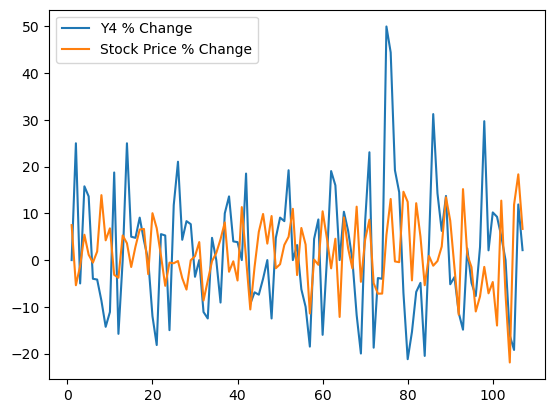

In [57]:
# Run 10th
stock_and_google_trends_df[['Y4 % Change', "Stock Price % Change"]].plot()

In [ ]:
## Prophet Modeling next

In [ ]:
## Next to do: Build ffunction that converts dfs to prophet dfs

In [17]:
# non logi
m = Prophet()

m.fit(running_shorts_df)

future = m.make_future_dataframe(periods=60, freq='M')

forecast = m.predict(future)

m.plot(forecast)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
# Use this if the model predicts values above 100 on google trends data

running_shorts_df['cap'] = 100
running_shorts_df['floor'] = 0

model = Prophet(growth='logistic')
model.fit(running_shorts_df)

future = model.make_future_dataframe(periods=100, freq='M')
future['cap'] = 100
future['floor'] = 0

forecast = model.predict(future)

display(forecast.tail(50))


In [ ]:
m.plot(forecast)

In [ ]:
# Call the Prophet function and store as an object
m = Prophet()
m


In [ ]:
m.fit(lulu_lemon_df)

In [ ]:
# Create a future DataFrame to hold predictions
# Make the prediction go out as far as 720 hours (30 days)
future = m.make_future_dataframe(periods=60, freq='M')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))

In [ ]:
forecast = m.predict(future)
display(forecast.head(10))

In [ ]:
m.plot(forecast)

In [ ]:
lulu_lemon_df.dropna()

In [ ]:

m = Prophet()
m.fit(lulu_df)

In [ ]:
future = m.make_future_dataframe(periods=500, freq='D')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))


In [ ]:
forecast = m.predict(future)
display(forecast.head(10))


In [ ]:
m.plot(forecast)